# titanic_passengers_Notebook_Project

##### Dans ce cas d’étude nous travaillerons avec la base de données appelée titanic. Notre objectif sera de realiser des analyses sur cette base et de construire des modèles de machine learning dans le but de prédire la survie des passagers du bateau.

#### Plan d’étude
##### 1-) Inspection et nettoyage du jeu de données
##### 2-) Réalisations d’analyses univariées et bivariées
##### 3-) Construction, évaluation et optimisation des modèles

### Chargment des libraries

In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer 
from scipy.stats import anderson, kstest
from scipy.stats import chi2_contingency, anderson, kstest, mannwhitneyu 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score


### Preparation de Dataset

In [61]:
# importation de la première partie du dataset
titanic=pd.read_csv("Titanic-Dataset.csv")
# dimension
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
titanic.shape

(891, 12)

In [63]:
titanic.size

10692

In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1-) Gestion des valeurs manquantes

In [65]:
# Variables présentant des valeurs manquantes
pd.isnull(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Version isna

In [66]:
# Variables présentant des valeurs manquantes
pd.isna(titanic).sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
titanic.duplicated().sum()

0

In [68]:
# supression de la variable cabin
titanic.drop(columns = "Cabin", inplace = True)

In [69]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [70]:
# Remplacement des valeurs manquantes de la variable Embarked par le mode
titanic["Embarked"] = titanic["Embarked"].astype("category")

#transformation du type de la variable pour effectuer l'imputation
mode_ = titanic["Embarked"].mode().iloc[0]
titanic["Embarked"].fillna(mode_, inplace = True)


In [71]:
# Variables présentant des valeurs manquantes
pd.isna(titanic).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [72]:
# Remplacement des valeurs manquantes de la variable "age"
imputer = KNNImputer(n_neighbors = 3) # choix du nombre de voisin
# Remodeler la colonne "Age" pour la rendre 2D
age_2d = titanic["Age"].values.reshape(-1, 1)
titanic["Age"] = imputer.fit_transform(age_2d) # ajustement des données aux données existentes


In [73]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 70.7+ KB


In [74]:
pd.isna(titanic).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 2-) Recodage des variables catégorielles

In [75]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 1
titanic.loc[titanic["Sex"] == "female", "Sex"] = 0

In [76]:
titanic["Embarked"] = titanic["Embarked"].astype("object")
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 2

### 3-) Changement du type des variables du jeu de données

In [77]:
# Transformation des variables catégorielles
variables_cat = ['Survived','Pclass','Sex', 'Embarked']
for i in variables_cat :
    titanic[i] = titanic[i].astype('category')

In [78]:
# Transformation de la variable age en type "int64"
titanic['Age'] = titanic['Age'].astype('int64')

In [79]:
# Visualisation de toutes les transformtions effectuées
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


## 2 2-) Analyses statistiques

### 2.1 2-1/ Analyses univariées
### Variables catégorielles :

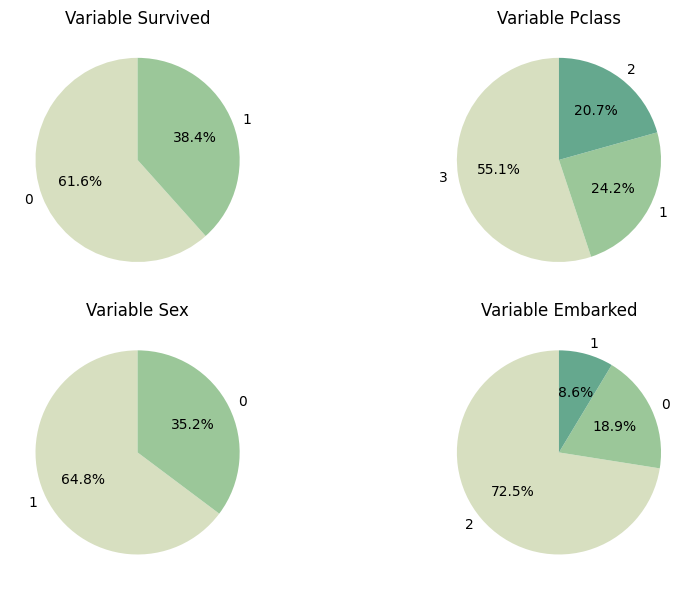

In [80]:
# diagramme circulaire des variables catégorielles d'une base de données
fig, axes = plt.subplots(2,2, figsize = (10,6))

# Aplatir le tableau d'axes
axes = axes.flatten()
for i, var in enumerate(variables_cat) :
    counts = titanic[var].value_counts()
    axes[i].pie(counts, labels = counts.index, autopct = "%1.1f%%", startangle= 90, colors = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(f"Variable {var}")

# Ajustements de la mise en page pour éviter les chevauchements
plt.tight_layout()
plt.show()



In [81]:
titanic["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Variables quantitatives

In [82]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,0


In [83]:
#Définissons nos variables quantitatives
variables_quant = ['Age', 'SibSp','Parch', 'Fare']

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\1055603646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(titanic[var], ax = axes[i] , palette = sns.cubehelix_palette(start=.5, rot=-.75))
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\1055603646.py:6: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(titanic[var], ax = axes[i] , palette = sns.cubehelix_palette(start=.5, rot=-.75))
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\1055603646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(titanic[var], ax = axes[i] , palette = sns.cubehelix_palette(start=.5, rot=-.75))
C:\Users\CYTech Student\

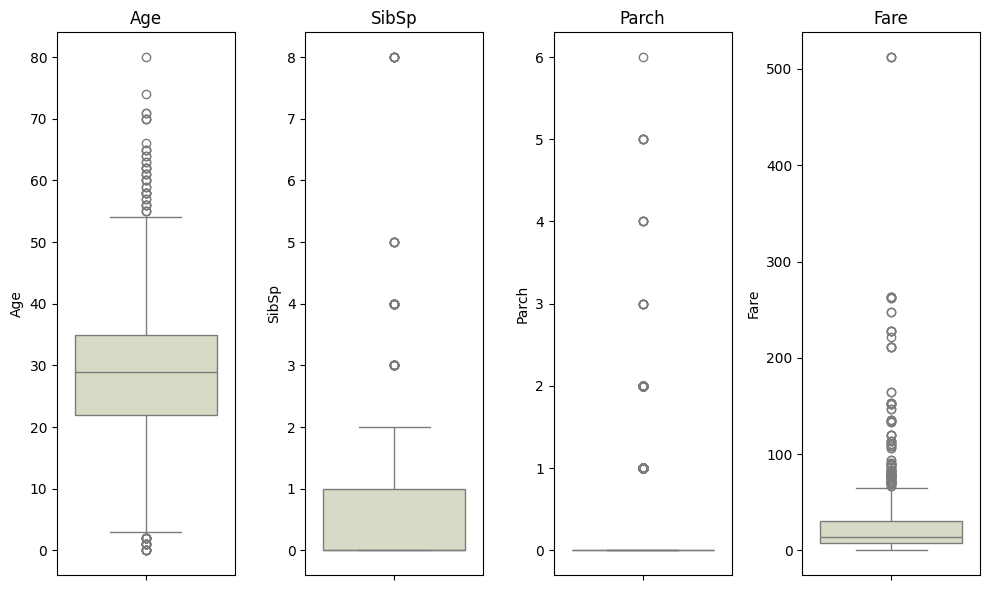

In [84]:
# Boîtes à moustache
fig, axes = plt.subplots(1,4 , figsize = (10,6))
axes = axes.flatten()

for i, var in enumerate(variables_quant) :
    sns.boxplot(titanic[var], ax = axes[i] , palette = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(f"{var}")

plt.tight_layout()
plt.show()

In [85]:
titanic.loc[:, variables_quant].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### Analysons la distribution de nos variables quantitatives

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\3082737721.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = titanic[var], ax = axes[i], bins = 30, kde = True,
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\3082737721.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = titanic[var], ax = axes[i], bins = 30, kde = True,
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\3082737721.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = titanic[var], ax = axes[i], bins = 30, kde = True,
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_19912\3082737721.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = titanic[var], ax = axes[i], bins = 30, kde = True,


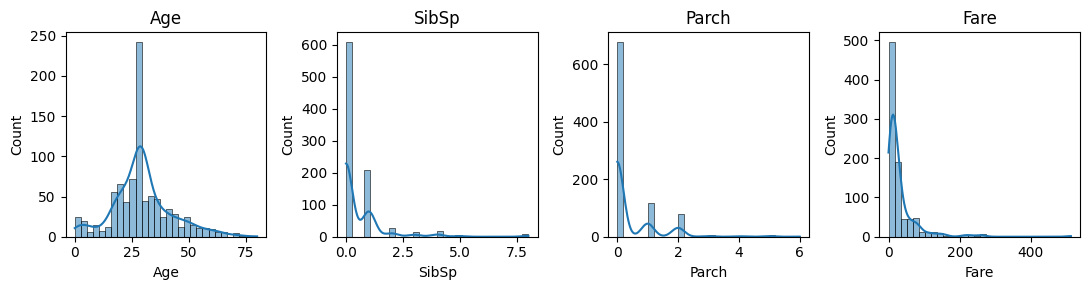

In [86]:
 #Histogrammes
fig, axes = plt.subplots(1,4, figsize = (11,3))
axes = axes.flatten()

for i,var in enumerate(variables_quant) :
    sns.histplot(x = titanic[var], ax = axes[i], bins = 30, kde = True,
    palette = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(var)
plt.tight_layout()
plt.show()


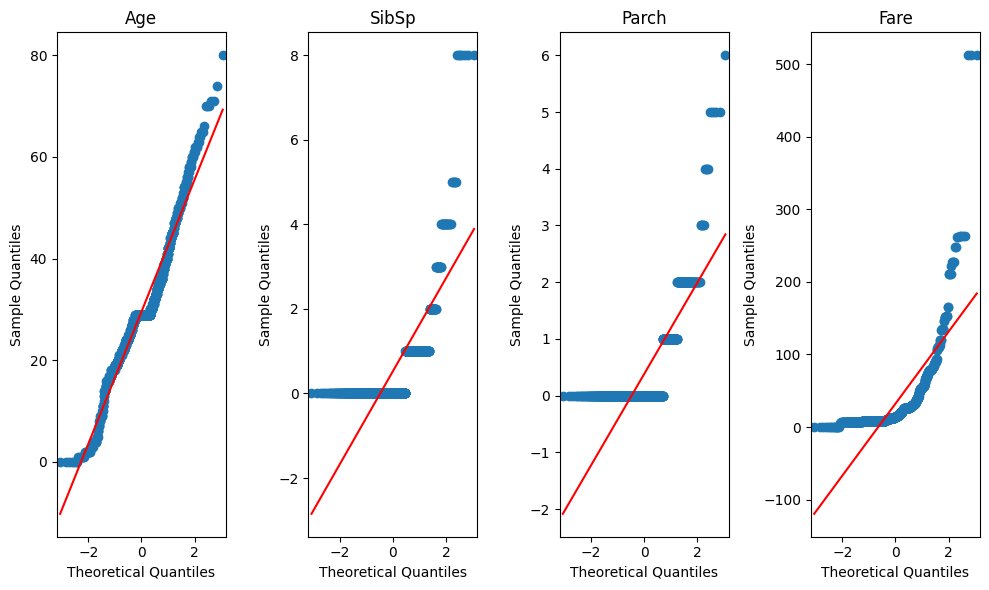

In [87]:
 # QQ-PLOT
fig, axes = plt.subplots(1,4 , figsize = (10,6))
axes = axes.flatten()

for i, var in enumerate(variables_quant):
    sm.qqplot(titanic[var], line = 's', ax = axes[i])
    axes[i].set_title(var)
plt.tight_layout()
plt.show()


##### D’après les observations des graphiques ci-dessus, il semblerait que seul la variable “Age” suive une loi normale. Pour être certain de cela, nous effectuerons des test de normalité plus particulièrement
##### celui d’Anderson Darling et celui de Kolmogorov Smirnov .
##### Les hypothèses des tests sont les suivantes :
#### H0 : La distribution de la variable suit une loi normale VS H1 : La distribution de la variable ne suit pas une loi normale

In [92]:


test_normalite = pd.DataFrame(columns=["Variables", "Stat_Anderson","Critical_value_Anderson", "Stat_KS", "P_value_KS"])
for var in variables_quant:
    resultats_anderson = anderson(titanic[var])
    stat_ks, p_value_ks = kstest(titanic[var], "norm")
# Utilisation de critical_values pour extraire les p-valeurs correctes du test d'Anderson-Darling
critical_value_anderson = resultats_anderson.critical_values[2]
test_normalite.loc[len(test_normalite)] = [var,resultats_anderson.statistic, critical_value_anderson, stat_ks, p_value_ks]
# Affichage du dataframe
test_normalite


,Variables,Stat_Anderson,Critical_value_Anderson,Stat_KS,P_value_KS
0,Fare,122.169627,0.784,0.983135,0.0


In [93]:
variables_quant

['Age', 'SibSp', 'Parch', 'Fare']

In [95]:
anderson(titanic["Age"])

AndersonResult(statistic=16.23351463555491, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=29.544332210998878, scale=13.013778302447072)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### 2.2 2.2/ Analyses bivariées
#### Variables quantitatives ~ Variables quantitatives
###### Pour analyser les variables quantitatives entre elles, nous utiliserons une matrice de corrélation afind’observer la liaison entre les variables

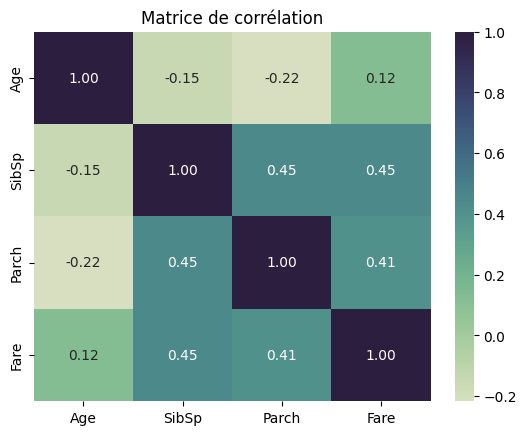

In [97]:
# Matrice de corrélation
matrix = titanic.loc[:, variables_quant].corr(method = "spearman")
sns.heatmap(matrix, annot = True, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), fmt = ".2f" )
plt.title("Matrice de corrélation")
plt.show()

#### Variables catégorielles ~ variable cible
##### Pour ce type de variable, nous procéderons à un test de Khi-deux afin de mesurer l’indépendance entre nos variables catégorielles.
#### Les hypothèses du test sont les suivantes :
 #### H0 : Les variables sont indépendantes VS H1 : Les variables sont dépendantes Si la p-value associée à ce test est inférieur au seuil de 0.05, nous rejetterons l’hypothèse nulle

In [98]:
 # P_value et coef de Cramer
resultats = pd.DataFrame(columns = ["Nom_Var","Statistic_test", "P_value","V_Cramer"])
for i in variables_cat:
    if i != "Survived" :
        contingency_table = pd.crosstab(titanic[i],titanic["Survived"])
        Statistic_test, P_value,_,_ = chi2_contingency(contingency_table)
#calcul du V de cramer
n = len(titanic)
m = min(contingency_table.shape)-1
V_cramer = np.sqrt(Statistic_test / (n*m))
# Ajout des résultats dans le dataframe
resultats.loc[len(resultats)] = [i , Statistic_test, P_value, V_cramer]
# Affichage
resultats


,Nom_Var,Statistic_test,P_value,V_Cramer
0,Embarked,25.964453,0.000002,0.170707


In [99]:
variables_quant


['Age', 'SibSp', 'Parch', 'Fare']

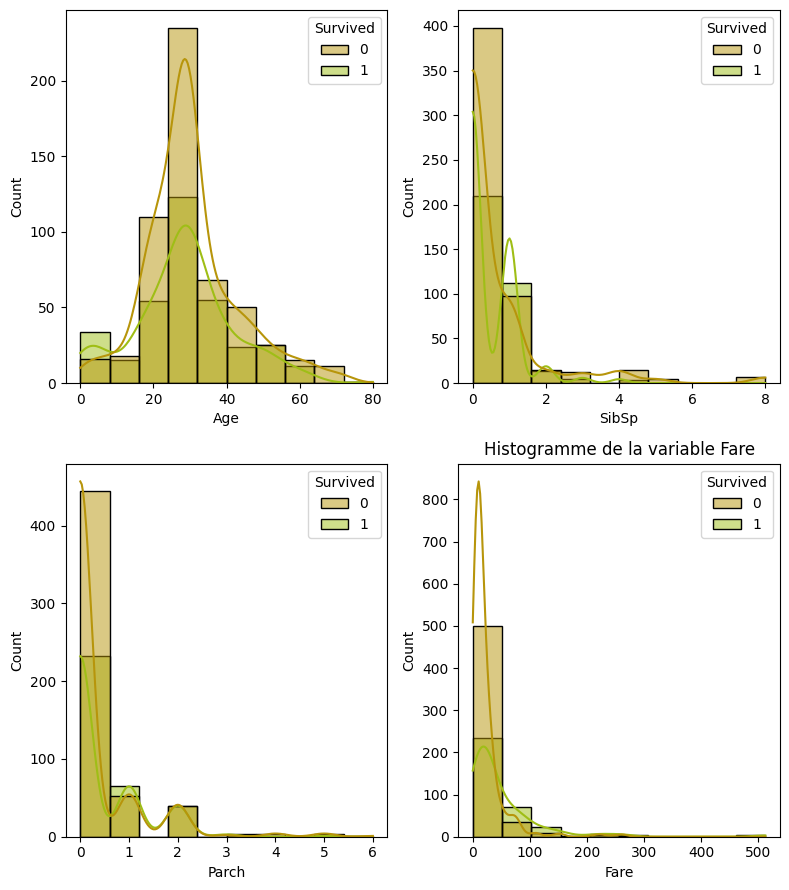

In [101]:
 fig, axes = plt.subplots(2,2, figsize= (8,9))
axes = axes.flatten()
for i, var in enumerate(variables_quant):
    sns.histplot(x = titanic[var], bins = 10, kde = True, hue =titanic["Survived"], ax = axes[i],
palette = ["#B7950B", "#9FBE16"] )
axes[i].set_title(f"Histogramme de la variable {var}")
plt.tight_layout()
plt.show()


In [104]:
res = pd.DataFrame(columns = ["Var", "Stat", "P_value"])
for var in variables_quant:
    group1 = titanic.loc[titanic["Survived"]== 1, var]
    group2 = titanic.loc[titanic["Survived"]== 0, var]
    stat, pvalue = mannwhitneyu(group1, group2, alternative='two-sided')
res.loc[len(res)] = [var, stat, pvalue]
# Affichage
res

,Var,Stat,P_value
0,Fare,129951.5,4.553477e-22


### 3 3-) Machine Learning
##### 3.1 3-1 -) Apprentissage supervisée avec l’algorithme des K-NN Nous utiliserons le modèle K-Neirest Neighbors afin de prédire la survie des passagers du bâteau.

In [106]:
# Noms des colonnes du dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [107]:
### Division du jeu de données en train et test set
features = titanic.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]
target = titanic["Survived"]

In [108]:
features_train, features_test,target_train, target_test = train_test_split(features, target, test_size = 0.2,random_state = 42)

In [109]:
# Inspection des données
features_train.shape

(712, 7)

In [110]:
# Inspection des données
features_test.shape

(179, 7)

### Standardisation :
##### Avant de pouvoir effectuer la mise en place de notre algorithme de K-NN, Nous allons standardiser  nos variables quantitatives.
##### Cette étape nous permettra de palier à la différence de grandeur existante entre nos variables (l’âge et le nombre de frères et soeurs par exemple. Celle-ci (la distance) peut avoir un impact dans le calcul des distances par l’algorithme.

In [112]:
# Standardisation
standard = StandardScaler()
features_train[variables_quant] = standard.fit_transform(features_train[variables_quant])
features_test[variables_quant] = standard.transform(features_test[variables_quant])
features_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,1.201713,-0.470722,-0.479342,-0.078684,2
733,2,1,-0.491364,-0.470722,-0.479342,-0.377145,2
382,3,1,0.201258,-0.470722,-0.479342,-0.474867,2
704,3,1,-0.260490,0.379923,-0.479342,-0.476230,2
813,3,0,-1.799652,2.931860,2.048742,-0.025249,2
...,...,...,...,...,...,...,...
106,3,0,-0.645281,-0.470722,-0.479342,-0.480162,2
270,1,1,-0.029616,-0.470722,-0.479342,-0.030545,2
860,3,1,0.893881,1.230569,-0.479342,-0.355804,2
435,1,0,-1.183987,0.379923,2.048742,1.683201,2


### Construction, entrainement et prédictions
#### Pour ce premier model, nous prenons k = sqrt(nombre de features). Nous ajusterons ensuite notre modèle plus tard à l’aide de la GridSearchCV


In [113]:
# Nombre de voisin de départ
np.sqrt(features.shape[1])

2.6457513110645907

In [114]:
# Construction du model 1
Knn_model1 = KNeighborsClassifier(3)
#Entrainement du model
Knn_model1.fit(features_train, target_train)


KNeighborsClassifier(n_neighbors=3)

In [119]:
 # Prédictions
target_pred = Knn_model1.predict(features_test)
target_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [116]:
# Accuracy
accuracy_score(target_test, target_pred)


0.8044692737430168

Text(0.5, 1.0, 'Confusion Matrix')

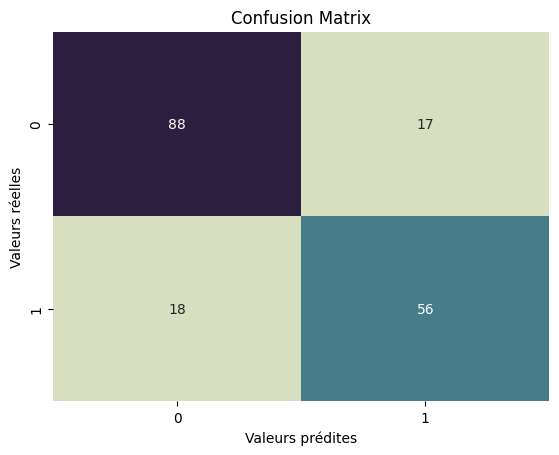

In [121]:
# Confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
sns.heatmap(conf_matrix, annot = True, cbar= False , cmap =sns.cubehelix_palette(start=.5, rot=-.75) )
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Confusion Matrix")

In [123]:
# Vérifions quelles classes sont considérées comme positives et négatives
positive_class = Knn_model1.classes_[1]
negative_class = Knn_model1.classes_[0]
print(f"Classe Positive : {positive_class}")
print(f"Classe Négative : {negative_class}")


Classe Positive : 1
Classe Négative : 0


In [124]:
# Métriques d'évaluation
a = precision_score(target_test, target_pred)
b = recall_score(target_test, target_pred)
c = f1_score(target_test, target_pred)
print(f"precision : {a}")
print(f"recall : {b}")
print(f" f1_score : {c}")


precision : 0.7671232876712328
recall : 0.7567567567567568
 f1_score : 0.761904761904762


### 1-/ Cross-Validation
###### Dans cette partie, nous éssayerons d’observer comment varie le f1_score en fonction des différentes valeurs de k (= Nombre de voisin) à l’aide d’un graphique

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


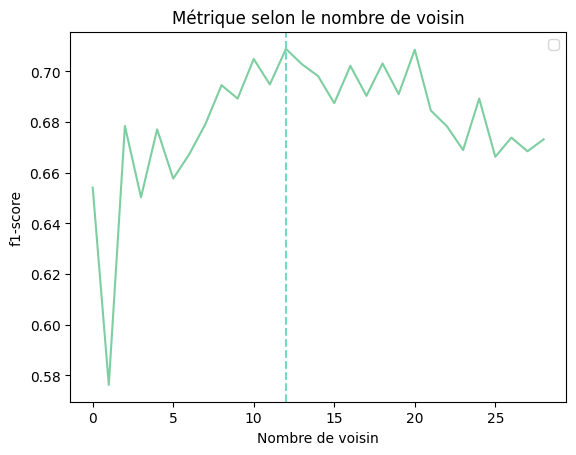

In [125]:
k_values = []
for i in range(1,30):
    score = cross_val_score(KNeighborsClassifier(i), features_train,target_train, cv = 5, scoring = 'f1').mean()
    k_values.append(score)
plt.plot(k_values, color = '#7DCEA0')
plt.xlabel('Nombre de voisin')
plt.ylabel('f1-score')

# Trouver la position du maximum dans la liste k_values
max_index = k_values.index(max(k_values))
plt.title('Métrique selon le nombre de voisin')
plt.axvline(x = max_index, color = '#76D7C4', linestyle = '--')
plt.legend()
plt.show()

In [126]:
# Création de la grille
params = {'n_neighbors' : np.arange(1,25),'metric' : ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params ,scoring = 'f1', cv =5)
# Entrainement
grid.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='f1')

In [127]:
# Meilleurs paramètres et meilleur score
print("Meilleurs paramètres :",grid.best_params_)
print("Meilleur score :", grid.best_score_)


Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 13}
Meilleur score : 0.7315697648291625


In [128]:
# Model 2
Knn_model2 = KNeighborsClassifier( n_neighbors = 13, metric = 'manhattan')
#Entrainement du model
Knn_model2.fit(features_train, target_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [129]:
# Prédictions et évaluation
target_pred2 = Knn_model2.predict(features_test)
f1_score(target_test, target_pred2)

0.7857142857142858

In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [131]:
# Transformons nos variables catégorielles en variables binaires (Encodage ONEHOT)
titanic2 = pd.get_dummies(titanic, columns=['Pclass','Embarked' ],drop_first=False)
for i in ['Pclass_1','Pclass_2','Pclass_3','Embarked_0','Embarked_1','Embarked_2'] :
    titanic2[i] = titanic2[i].astype("category")
    titanic2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Pclass_1     891 non-null    category
 10  Pclass_2     891 non-null    bool    
 11  Pclass_3     891 non-null    bool    
 12  Embarked_0   891 non-null    bool    
 13  Embarked_1   891 non-null    bool    
 14  Embarked_2   891 non-null    bool    
dtypes: bool(5), category(3), float64(1), int64(4), object(2)
memory usage: 56.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data co

In [133]:
# Division du jeu de données
features2 = titanic2.drop(['PassengerId', 'Survived', 'Name', 'Ticket'],axis = 1)
features2 = features2.astype(int)
target2 = titanic2["Survived"]
features2

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,22,1,0,7,0,0,1,0,0,1
1,0,38,1,0,71,1,0,0,1,0,0
2,0,26,0,0,7,0,0,1,0,0,1
3,0,35,1,0,53,1,0,0,0,0,1
4,1,35,0,0,8,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,27,0,0,13,0,1,0,0,0,1
887,0,19,0,0,30,1,0,0,0,0,1
888,0,29,1,2,23,0,0,1,0,0,1
889,1,26,0,0,30,1,0,0,1,0,0


In [135]:
# Division des jeux de données
features_train2, features_test2, target_train2, target_test2 =train_test_split(features2, target2, test_size = 0.2,random_state = 42 )

In [136]:
# Standardisation
standard = StandardScaler()
features_train2[variables_quant] = standard.fit_transform(features_train2[variables_quant])
features_test2[variables_quant] = standard.transform(features_test2[variables_quant])


In [137]:
# Model3
Knn_model3 = KNeighborsClassifier(3)
#Entrainement du model
Knn_model3.fit(features_train2, target_train2)
target_pred3 = Knn_model3.predict(features_test2)

In [139]:
f1_score(target_test2, target_pred3)

0.7777777777777778

In [140]:
 # GridSearchCV
params = {'n_neighbors' : np.arange(1,25),'metric' : ['euclidean', 'manhattan', 'minkowski']}
grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params ,scoring = 'f1', cv =5)
# Entrainement
grid.fit(features_train2, target_train2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='f1')

In [141]:
 # Meilleurs paramètres et meilleur score
print("Meilleurs paramètres :",grid.best_params_)
print("Meilleur score :", grid.best_score_)

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 13}
Meilleur score : 0.7186112948215742


In [142]:
# Model4
Knn_model4 = KNeighborsClassifier(n_neighbors = 13, metric = 'manhattan')
#Entrainement du model
Knn_model4.fit(features_train2, target_train2)
target_pred4 = Knn_model4.predict(features_test2)

In [143]:
# Valeur métrqiue
# Métriques d'évaluation
a = precision_score(target_test2, target_pred4)
b = recall_score(target_test2, target_pred4)
c = f1_score(target_test2, target_pred4)
print(f"precision : {a}")
print(f"recall : {b}")
print(f" f1_score : {c}")

precision : 0.8656716417910447
recall : 0.7837837837837838
 f1_score : 0.8226950354609929


Text(0.5, 23.52222222222222, 'Valeurs prédites')

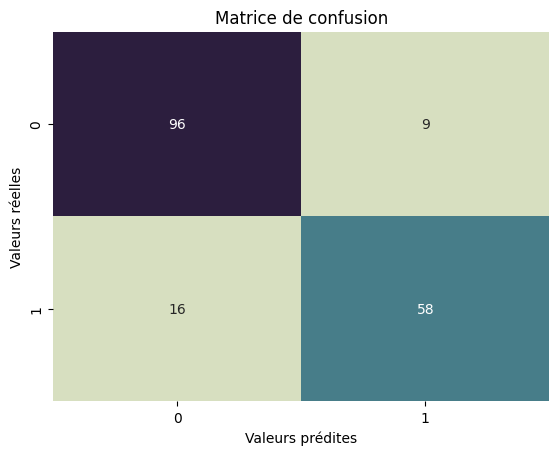

In [144]:
matrix = confusion_matrix(target_test2, target_pred4)
sns.heatmap(matrix, annot = True, cbar = False, cmap =sns.cubehelix_palette(start=.5, rot=-.75))
plt.title("Matrice de confusion")
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")

<Figure size 2000x2000 with 0 Axes>

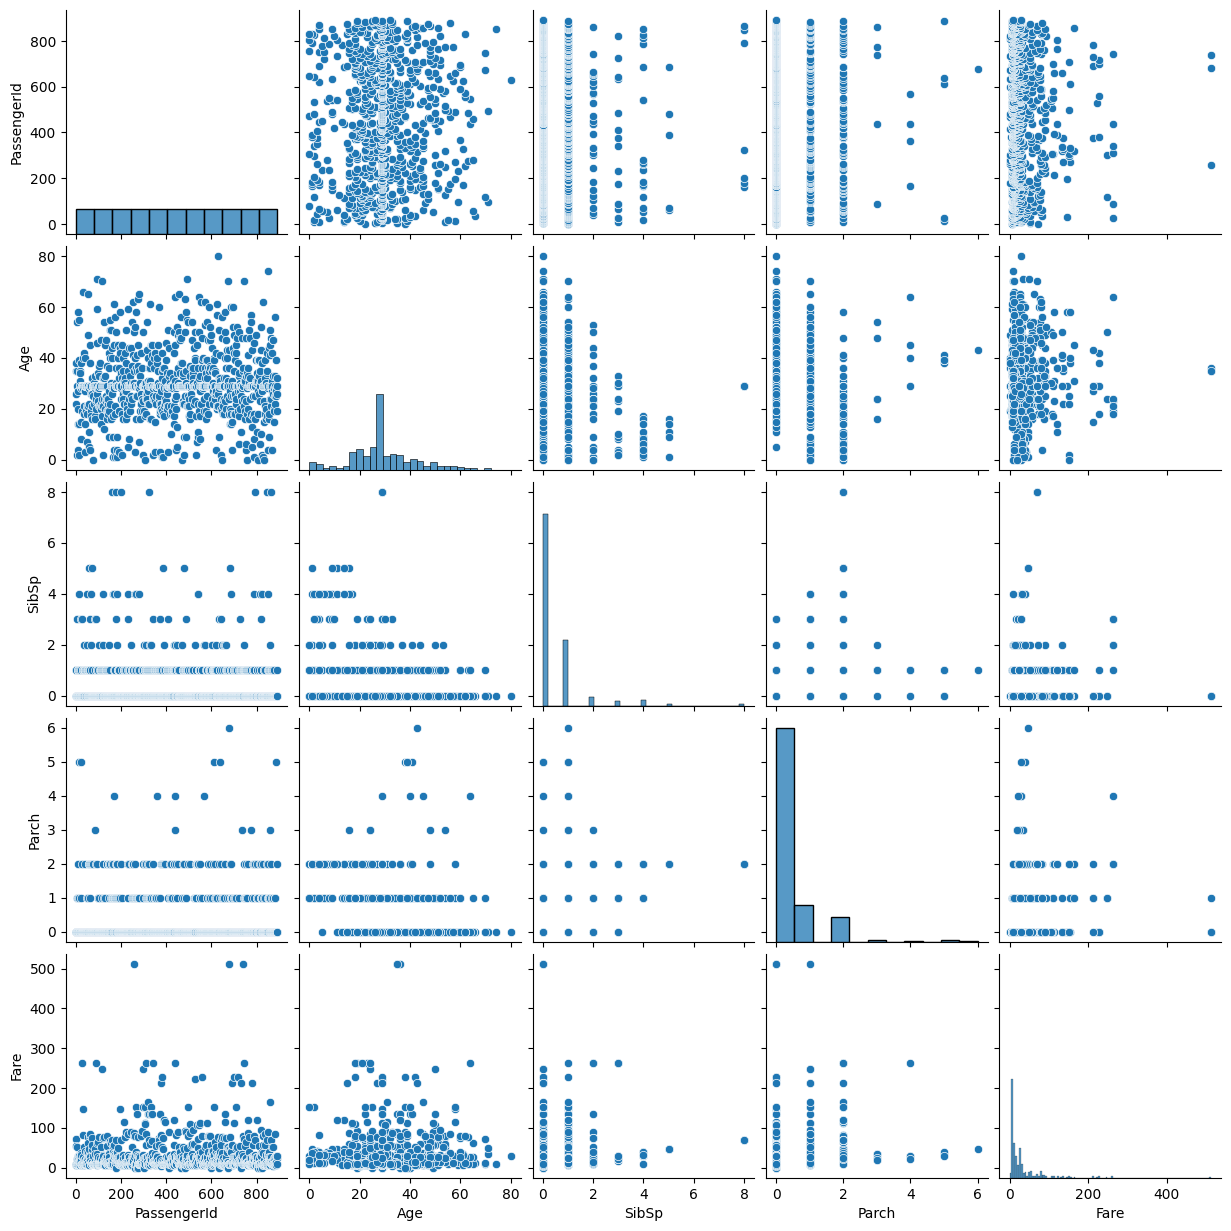

In [145]:
plt.figure(figsize=(20,20))
sns.pairplot(titanic)
plt.show()